# TP 4

Dans ce TP nous allons manipuler la définition et l'utilisation de fonctions (que nous avons déjà vues en TD).
Le TP commence par de petits execrcices de définition et utilisation de fonctions puis vous verrez comment elles peuvent être utilisées pour décomposer un problème en sous problèmes de manière élégante.


## Définitions de fonctions simples

### addN

Définir une fonction nommée $addN$ qui prend 2 entiers naturels $i1$ et $n$ en paramètre et qui retourne un entier de valeur $i1 + n$

Vous utiliserez cette fonction pour modifier tous les éléments d'une liste d'entier nommée $maListe$ de sorte que:

$\forall i \in maListe, i = i + i$.

In [ ]:
#mettez votre code ici

### ChangeColor

Définir une fonction nommée $changeColor$ qui prend 2 $Pixel$s $p$ et $pNewColor$ en paramètre. 

Cette fonction doit remplacer chaque composante $r,g,b$ de $p$ par celles de $pNewColor$. 

L'argument d'appel prenant l'étiquette $p$ dans le corps de la fonction (de type pixel) doit être modifié après l'appel.

Testez votre fonction pour changer un pixel de couleur noir en un pixel de couleur gris moyen.

In [ ]:
import cv2
from iiwHelper import *

#mettez votre code ici

### areEqualsWithTolerance

Définir une fonction nommée $areEqualsWithTolerance$ qui prend 2 $Pixel$s $p1$ et $p2$ comme paramètre. 

Cette fonction prend également un entier entre 0 et 255 nommé $tolerance$ en paramètre. 

La fonction doit renvoyer $True$ si chaque composante $r,g,b$ de $p2$ appartiennent respectivement à $[p1.r-tolerance; p1.r+tolerance], [p1.g-tolerance; p1.g+tolerance], [p1.b-tolerance; p1.b+tolerance]$, $False$ autrement.

Faite au moins deux tests significatifs

In [ ]:
import cv2
from iiwHelper import *

#mettez votre code ici

## Manipulation d'images

### Changement de couleur

Soit la variable nommée $img$ de type $ImagePPM$ dans le code ci dessous

Soit une variable nommée $pRef$ de type $Pixel$ et de valeur r=53, g=132 et b=160 que vous définirez.
Soit une autre variable nommée $pNew$ de type $Pixel$ que vous définirez avec les valeurs de votre choix.

En utilisant les fonctions ci dessus, écrire un algorithme permettant changer tous les pixels de $img$ qui sont égaux à $pRef$ avec une tolérance de 50 par des pixels égaux à $pNew$. 

In [ ]:
import cv2
from iiwHelper import *

image: ImagePPM = loadImage('./pict/logo.txt')

#mettez votre code ici

#### Optionel: la fonction changeImageColor

On aimerait pouvoir avoir le logo ci dessus de différentes couleur et donc réutiliser le code ci dessus plus facilement. 

On veut donc créer une fonction $changeImageColor$ qui prend en paramètre une chaine de caratère représentant le chemin vers une image, et deux pixels définissant la couleur à changer et la couleur à appliquer.

Définissez une telle fonction. Que retourne t'elle ? Quel autre paramètre pourrait-on rajouter à cette fonction ?

In [ ]:
import cv2
from iiwHelper import *
import random

#mettez la définition de changeImageColor ici



#ci dessous se trouve un code de test de votre fonction.
nbLogo: int = int(15)
i: int = int(0)
while (i < nbLogo):
    nr: int = int(random.randint(0, 255))
    ng: int = int(random.randint(0, 255))
    nb: int = int(random.randint(0, 255))
    showImage(changeImageColor('./pict/logo.txt',Pixel(53,132,160), Pixel(nr,ng,nb)))
    i = i + 1

### Effet drapeau

Après avoir définit 2 fonctions utiles, nous les utiliserons pour créer des effets de drapeau sur des images

#### getX et getY

Définir une fonction nommée $getX$ qui prend une $ImagePPM$ en paramètre ainsi que l'indice $pixelIndex$ d'un pixel dans la liste de pixels de l'image et qui revoit sa position en X.

Définir une fonction nommée $getY$ qui prend une $ImagePPM$ en paramètre ainsi que l'indice $pixelIndex$ d'un pixel dans la liste de pixels de l'image et qui revoit sa position en Y.

Testez ces fonctions en donnant affichant la position en X et en Y de chaque pixel de l'image ./pict/miniDamier.txt

In [ ]:
import cv2
from iiwHelper import *

#mettez votre code ici
    

#### Drapeau Français

Soit l'image nommée $img$ de type $ImagePPM$ dans le code ci dessous, écrire un algorithme qui pour chacun des pixels de l'image:
 * garde la composante $b$ des pixels dont la position en X est inférieur à 1/3 de la largeur de l'image. Les autres composantes sont divisées par 3;
 * garde la composante $r$ des pixels dont la position en X est supérieur à 2/3 de la largeur de l'image. Les autres composantes sont divisées par 3;
 * augmente la valeur des composantes $r,g,b$ de 100 pour les pixels dont la position en X est comprise entre 1/3 et 2/3 de la largeur de l'image. (rq: avoir une valeur de pixel supérieur à 255 n'est pas souhaitable mais n'empche pas l'image de s'afficher correctement)
 
 L'effet escompté est le suivant:
 
 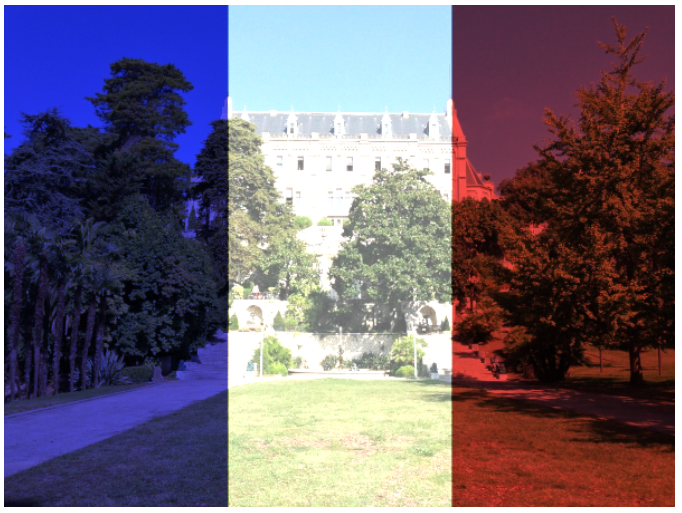</img>

In [ ]:
image: ImagePPM = loadImage('./pict/valrose.txt')

#mettez votre code ici

#### Drapeau Japonais

On désire appliquer l'effet "drapeau Japonais" à une image. L'effet escompté est le suivant:

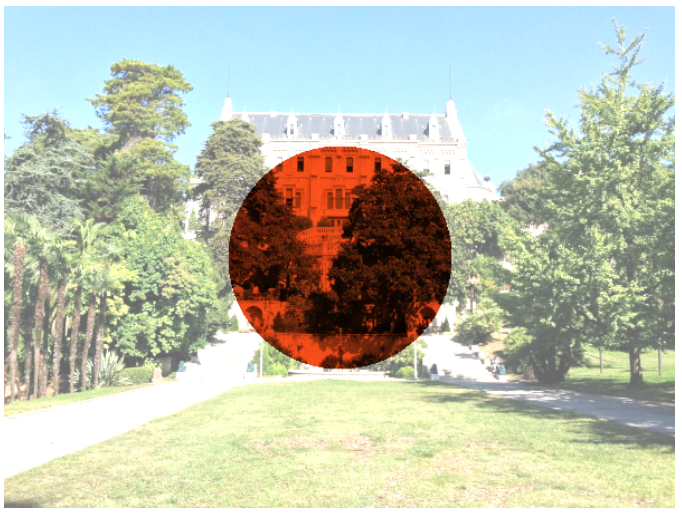</img>

Quelles sont selon vous les fonctions utiles. Définissez les et utilisez les afin de réaliser l'algorithme permettant de réaliser l'effet souhaité.

In [ ]:
import cv2
from iiwHelper import *

#mettez votre code ici